In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.

In [2]:
Data = {}
columns = []
with open("./test2.txt",'r') as f:
    columns = f.readline().strip().split(',')
    for col in columns:
        Data[col] = []
    for i in range(5):
        rows = f.readline().strip().split(',')
        for col, row in zip(columns,rows):
            Data[col].append(row)
    f.close()

df = pd.DataFrame(Data)
df

,Opsi,Potential impact,Workload: technical,Workload: non-technical,Workload: monitoring,Data requirement,Relevance to stakeholders needs,Sustainability
0,A,Besar,Sedang,Sedang,Sedang,Besar,Sedang,Besar
1,B,Sedang,Sedang,Besar,Sedang,Sedang,Kecil,Kecil
2,C,Besar,Kecil,Besar,Sedang,Besar,Sedang,Sedang
3,D,Kecil,Besar,Sedang,Kecil,Besar,Besar,Kecil
4,E,Sedang,Besar,Kecil,Sedang,Kecil,Sedang,Sedang


In [3]:
weights = np.array([0.2,0.15,0.1,0.1,0.2,0.15,0.1])

def mapStr(x, asc=False):
    if x.lower() == 'kecil':
        if asc:
            return 3
        return 1
    if x.lower() == 'sedang':
        return 2
    if x.lower() == 'besar':
        if asc:
            return 1
        return 3

    
for col in columns[1:]:
    if col in columns[2:6]:
        df[col] = df[col].apply(lambda x: mapStr(x, True))
    else:
        df[col] = df[col].apply(lambda x: mapStr(x, False))

df["Val"] = df.loc[:,columns[1:]].apply(lambda x: x.dot(weights), axis=1)

In [4]:
df

,Opsi,Potential impact,Workload: technical,Workload: non-technical,Workload: monitoring,Data requirement,Relevance to stakeholders needs,Sustainability,Val
0,A,3,2,2,2,1,2,3,2.10
1,B,2,2,1,2,2,1,1,1.65
2,C,3,3,1,2,1,2,2,2.05
3,D,1,1,2,3,1,3,1,1.60
4,E,2,1,3,2,3,2,2,2.15


In [5]:
dfw = pd.DataFrame(columns = columns[1:])
dfw.loc[0] = weights
dfw

,Potential impact,Workload: technical,Workload: non-technical,Workload: monitoring,Data requirement,Relevance to stakeholders needs,Sustainability
0,0.2,0.15,0.1,0.1,0.2,0.15,0.1


### 3. 

In [6]:
import requests
try: 
    from BeautifulSoup import BeautifulSoup
except ImportError:
    from bs4 import BeautifulSoup

In [7]:
parsed_table = BeautifulSoup(open(r'./table3.xml').read())
rows = parsed_table.find('tbody').find_all('tr')
tab = {'kabupaten': [], 'status': []} 

for row in rows:
    data = row.find_all('td')
#     tab['provinsi'].append(data[0].text)
    tab['kabupaten'].append(data[1].text)
    tab['status'].append(data[2].text)
df_status = pd.DataFrame(tab).set_index('kabupaten')
df_status

,status
kabupaten,
SUKABUMI,RISIKO SEDANG
CIANJUR,RISIKO RENDAH
BANDUNG,RISIKO SEDANG
GARUT,RISIKO TINGGI
TASIKMALAYA,RISIKO RENDAH
CIAMIS,RISIKO SEDANG
KUNINGAN,RISIKO SEDANG
CIREBON,RISIKO SEDANG
MAJALENGKA,RISIKO TINGGI


In [8]:
dataAPI = requests.get(r'https://covid19-public.digitalservice.id/api/v1/sebaran_v2/jabar').json()

In [9]:
df = pd.DataFrame.from_records(dataAPI['data']['content'])
df

,id,kode_kab,nama_kab,kode_kec,nama_kec,kode_kel,nama_kel,status,stage,umur,gender,longitude,latitude,tanggal_update_nasional,tanggal_konfirmasi,tanggal_update
0,covid-1022200029266,3276,Kota Depok,3276041,Tapos,3276041007,Sukatani,CLOSECONTACT,Dikarantina,54,Perempuan,106.887,-6.394,2020-12-16,2020-12-16,2020-12-16
1,covid-1022200029265,3276,Kota Depok,3276010,Sawangan,3276010006,Sawangan Baru,CLOSECONTACT,Discarded,65,Perempuan,106.768,-6.402,2020-12-16,2020-12-16,2020-12-16
2,covid-1022200029264,3276,Kota Depok,3276010,Sawangan,3276010006,Sawangan Baru,CLOSECONTACT,Discarded,46,Perempuan,106.768,-6.402,2020-12-16,2020-12-16,2020-12-16
3,covid-1022200029267,3276,Kota Depok,3276010,Sawangan,3276010006,Sawangan Baru,CLOSECONTACT,Discarded,37,Perempuan,106.768,-6.402,2020-12-16,2020-12-16,2020-12-16
4,covid-1022200029268,3276,Kota Depok,3276041,Tapos,3276041007,Sukatani,CLOSECONTACT,Discarded,11,Perempuan,106.887,-6.394,2020-12-16,2020-12-16,2020-12-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251239,from_manual_69496,0000,Jawa Barat,000000,,0000000000,,CONFIRMATION,Diisolasi,,Perempuan,NaN,NaN,2020-12-16,2020-12-16,
251240,from_manual_69497,0000,Jawa Barat,000000,,0000000000,,CONFIRMATION,Diisolasi,,Perempuan,NaN,NaN,2020-12-16,2020-12-16,
251241,from_manual_69498,0000,Jawa Barat,000000,,0000000000,,CONFIRMATION,Diisolasi,,Perempuan,NaN,NaN,2020-12-16,2020-12-16,
251242,from_manual_69499,0000,Jawa Barat,000000,,0000000000,,CONFIRMATION,Diisolasi,,Perempuan,NaN,NaN,2020-12-16,2020-12-16,


In [10]:
df_valid = df[df['kode_kab']!='0000']
df_valid

,id,kode_kab,nama_kab,kode_kec,nama_kec,kode_kel,nama_kel,status,stage,umur,gender,longitude,latitude,tanggal_update_nasional,tanggal_konfirmasi,tanggal_update
0,covid-1022200029266,3276,Kota Depok,3276041,Tapos,3276041007,Sukatani,CLOSECONTACT,Dikarantina,54,Perempuan,106.887,-6.394,2020-12-16,2020-12-16,2020-12-16
1,covid-1022200029265,3276,Kota Depok,3276010,Sawangan,3276010006,Sawangan Baru,CLOSECONTACT,Discarded,65,Perempuan,106.768,-6.402,2020-12-16,2020-12-16,2020-12-16
2,covid-1022200029264,3276,Kota Depok,3276010,Sawangan,3276010006,Sawangan Baru,CLOSECONTACT,Discarded,46,Perempuan,106.768,-6.402,2020-12-16,2020-12-16,2020-12-16
3,covid-1022200029267,3276,Kota Depok,3276010,Sawangan,3276010006,Sawangan Baru,CLOSECONTACT,Discarded,37,Perempuan,106.768,-6.402,2020-12-16,2020-12-16,2020-12-16
4,covid-1022200029268,3276,Kota Depok,3276041,Tapos,3276041007,Sukatani,CLOSECONTACT,Discarded,11,Perempuan,106.887,-6.394,2020-12-16,2020-12-16,2020-12-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249805,from_manual_68062,3204,Kabupaten Bandung,3204130,ciparay,3204130014,bumiwangi,CONFIRMATION,Diisolasi,19,Perempuan,107.695,-7.040,2020-12-15,2020-11-26,
249806,from_manual_68063,3204,Kabupaten Bandung,3204180,katapang,3204180010,sukamukti,CONFIRMATION,Diisolasi,60,Laki-laki,107.581,-7.001,2020-12-15,2020-11-26,
249807,from_manual_68064,3204,Kabupaten Bandung,3204160,banjaran,3204160007,kiangroke,CONFIRMATION,Diisolasi,40,Laki-laki,107.567,-7.050,2020-12-15,2020-11-19,
249808,from_manual_68065,3204,Kabupaten Bandung,3204080,paseh,3204080003,cipaku,CONFIRMATION,Diisolasi,55,Laki-laki,107.783,-7.059,2020-12-15,2020-11-11,


In [11]:
df_valid.stage.value_counts()
# df_valid.status.value_counts()
# df_valid.gender.value_counts()
# df_valid.nama_kab.value_counts()

Discarded      155884
Selesai         55957
Diisolasi       18510
Dikarantina     15446
Meninggal        1725
Name: stage, dtype: int64

In [12]:
dataGeoProv = requests.get(r' https://data.jabarprov.go.id/dataset/49beae49-4cf8-4090-aaba-9c6ed38326f9/resource/df001c21-6ce7-4136-907e-66a990a20bf9/download/jawa-barat.geojson').json()
dataGeoKK = requests.get(r'https://data.jabarprov.go.id/dataset/49beae49-4cf8-4090-aaba-9c6ed38326f9/resource/fff4a9bf-11a8-4b79-b416-f11a0ef16e5a/download/kota.geojson').json()

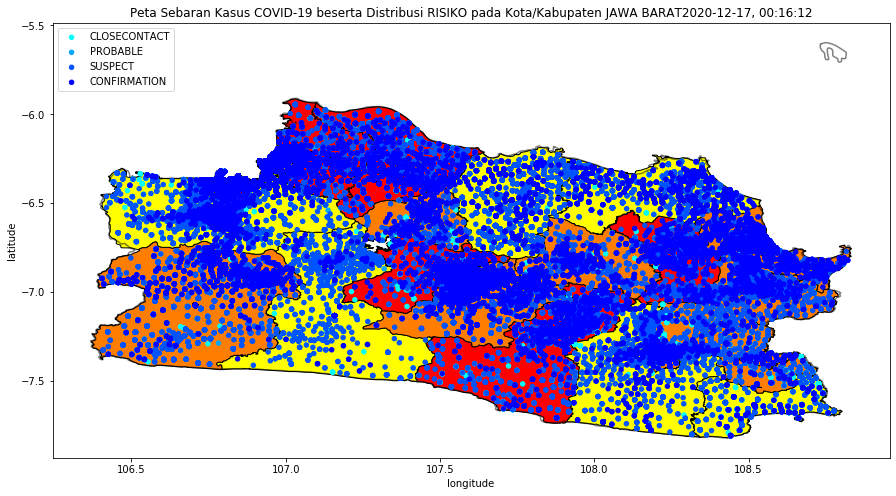

In [21]:
status_color = {
    'RISIKO RENDAH': (1,1,0),
    'RISIKO SEDANG': (1,125/255,0),
    'RISIKO TINGGI': (1,0,0)
}

coordinates = dataGeoProv['geometry']['coordinates']
coo1 = np.array(coordinates[0][0])
coo2 = np.array(coordinates[1][0])

fig, axs = plt.subplots(figsize=(15,8))

## Plot data dari Open Data Jawa Barat
axs.plot(coo1[:,0], coo1[:,1], alpha=0.5, color='black')
axs.plot(coo2[:,0], coo2[:,1], alpha=0.5, color='black')
for fea in dataGeoKK['features']:
    for coos in fea['geometry']['coordinates']:
        for coo in coos:
            coor = np.array(coo)
            kab = fea['properties']['bps_nama']
            status = df_status.loc[kab, 'status']
#             print(kab , status, status_color[status])
#             break
            axs.fill(coor[:,0], coor[:,1], alpha = 1, fc = status_color[status], ec='black')


## Plot data dari API
status_color_API = {
    'CLOSECONTACT': (0,1,1),
    'PROBABLE': (0,0.66,1),
    'SUSPECT': (0,0.33,1),
    'CONFIRMATION': (0,0,1)
}
df_valid.loc[:,'color'] = df_valid.loc[:,'status'].apply(lambda x: status_color_API[x])
# df_valid.head()
p = []
for i, status in enumerate(status_color_API.keys()):
    cond = df_valid['status']==status
    p.append(axs.scatter(df_valid[cond]['longitude'], df_valid[cond]['latitude'],
                         c=df_valid[cond]['color'], s = 20, zorder=100+i))

axs.set_title("Peta Sebaran Kasus COVID-19 beserta Distribusi RISIKO pada Kota/Kabupaten JAWA BARAT{}".
              format(dataAPI['data']['metadata']['last_update']))
axs.set_xlabel("longitude")
axs.set_ylabel("latitude")
plt.legend(p, status_color_API.keys())
plt.show()

### 5.

In [14]:
df_sampledata = pd.read_csv(r'./Sample Data - sample_data.csv')
df_sampledata.head()

,id,kemendagri_kabupaten_nama,kemendagri_kabupaten_kode,date,hour,level,geometry,avg_speed_kmh
0,8230974,KOTA BANDUNG,32.73,2020-01-01,7,2,"{'type': 'MultiLineString', 'coordinates': [[[...",14.06750
1,8230965,KOTA BANDUNG,32.73,2020-01-01,6,2,"{'type': 'MultiLineString', 'coordinates': [[[...",8.55000
2,8230966,KOTA BANDUNG,32.73,2020-01-01,6,4,"{'type': 'MultiLineString', 'coordinates': [[[...",3.94875
3,8230967,KOTA BANDUNG,32.73,2020-01-01,6,2,"{'type': 'MultiLineString', 'coordinates': [[[...",20.20710
4,8230968,KOTA BANDUNG,32.73,2020-01-01,6,2,"{'type': 'MultiLineString', 'coordinates': [[[...",40.94400


#### (a)
SELECT a.id  FROM sample_data AS a
WHERE a.level = 5;

In [15]:
df_sampledata[df_sampledata['level']==5]

,id,kemendagri_kabupaten_nama,kemendagri_kabupaten_kode,date,hour,level,geometry,avg_speed_kmh
17,8230983,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
28,8230994,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
29,8230995,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
30,8230996,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
53,8231018,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
54,8231019,KOTA BANDUNG,32.73,2020-01-01,7,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
55,8231029,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
56,8231041,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
57,8231042,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0
80,8231085,KOTA BANDUNG,32.73,2020-01-01,8,5,"{'type': 'MultiLineString', 'coordinates': [[[...",0.0


#### (b)
SELECT COUNT(a.id) AS Total  FROM sample_data AS a
WHERE a.level = 5;

In [16]:
df_sampledata[df_sampledata['level']==5].id.count()

11

#### (c)
SELECT a.id
FROM sample_data AS a
WHERE a.hour BETWEEN 15 AND 18;

In [17]:
df_sampledata[df_sampledata.hour<=18][df_sampledata.hour>=15]

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,kemendagri_kabupaten_nama,kemendagri_kabupaten_kode,date,hour,level,geometry,avg_speed_kmh
32,8233037,KOTA BANDUNG,32.73,2020-01-01,16,1,"{'type': 'MultiLineString', 'coordinates': [[[...",20.5400
140,8233313,KOTA BANDUNG,32.73,2020-01-01,17,2,"{'type': 'MultiLineString', 'coordinates': [[[...",15.9911


#### (d)
SELECT hour_level, COUNT(hour_level)
FROM sample_data AS a
GROUP BY concat_ws(',', a.hour, a.level) AS hour_level
ORDER BY COUNT(hour_level) DESC;

In [18]:
df_sampledata['hour_level'] = df_sampledata.loc[:,['hour','level']].apply(lambda x: (x.hour, x.level), axis=1)
df_sampledata.hour_level.value_counts()

(8, 2)     26
(8, 3)     18
(7, 3)     17
(7, 2)     15
(9, 2)     12
(8, 4)      9
(8, 1)      9
(7, 4)      8
(9, 3)      8
(7, 5)      6
(8, 5)      5
(9, 1)      5
(6, 2)      3
(6, 4)      2
(6, 3)      2
(9, 4)      2
(17, 2)     1
(19, 3)     1
(16, 1)     1
Name: hour_level, dtype: int64

KeyError: "None of [Index(['hour', 'level'], dtype='object')] are in the [columns]"